# Prosper Loan Data Exploration
## by Varun Kumar
## Preliminary Wrangling

* This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. This data dictionary explains the variables in the data set.

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [149]:
# Load Dataset
df = pd.read_csv('prosperLoanData.csv', sep=',')

In [150]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [152]:
sum(df.duplicated())

0

In [153]:
#Check for number and percentage of Nulls
num_missing = df.isna().sum()
num_missing = num_missing[num_missing > 0] 
percent_missing = num_missing * 100 / df.shape[0]
percent_missing = percent_missing.round(2) 
pd.concat([num_missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
GroupKey,100596,88.29
LoanFirstDefaultedCycleNumber,96985,85.12
ScorexChangeAtTimeOfListing,95009,83.39
ProsperPrincipalOutstanding,91852,80.62
ProsperPrincipalBorrowed,91852,80.62
ProsperPaymentsOneMonthPlusLate,91852,80.62
ProsperPaymentsLessThanOneMonthLate,91852,80.62
OnTimeProsperPayments,91852,80.62
TotalProsperPaymentsBilled,91852,80.62
TotalProsperLoans,91852,80.62


In [154]:
sub_data =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'Investors'
]

loan_subdata = df[sub_data]

In [155]:
loan_subdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
 11  Recommendations            113937 non-null  int64  
 12  Investors                  113937 non-null  int64  
dtypes: float64(4), int64(5), obje

In [156]:
missing_data = loan_subdata.isna().sum()
missing_data = missing_data[missing_data> 0]
missing_data

ProsperRating (Alpha)      29084
EmploymentStatus            2255
DelinquenciesLast7Years      990
TotalProsperLoans          91852
dtype: int64

In [157]:
loan_subdata = loan_subdata.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [158]:
loan_subdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      84853 non-null  int64  
 1   Term                       84853 non-null  int64  
 2   LoanStatus                 84853 non-null  object 
 3   BorrowerRate               84853 non-null  float64
 4   ProsperRating (Alpha)      84853 non-null  object 
 5   ListingCategory (numeric)  84853 non-null  int64  
 6   EmploymentStatus           84853 non-null  object 
 7   DelinquenciesLast7Years    84853 non-null  float64
 8   StatedMonthlyIncome        84853 non-null  float64
 9   TotalProsperLoans          19797 non-null  float64
 10  LoanOriginalAmount         84853 non-null  int64  
 11  LoanOriginationDate        84853 non-null  object 
 12  Recommendations            84853 non-null  int64  
 13  Investors                  84853 non-null  int

In [159]:
loan_subdata['LoanOriginationDate'] = pd.to_datetime(loan_subdata['LoanOriginationDate'])

In [160]:
loan_subdata.isna().sum()

index                            0
Term                             0
LoanStatus                       0
BorrowerRate                     0
ProsperRating (Alpha)            0
ListingCategory (numeric)        0
EmploymentStatus                 0
DelinquenciesLast7Years          0
StatedMonthlyIncome              0
TotalProsperLoans            65056
LoanOriginalAmount               0
LoanOriginationDate              0
Recommendations                  0
Investors                        0
dtype: int64

In [161]:
loan_subdata['TotalProsperLoans'] = loan_subdata['TotalProsperLoans'].fillna(0)

In [162]:
loan_subdata.isna().sum()

index                        0
Term                         0
LoanStatus                   0
BorrowerRate                 0
ProsperRating (Alpha)        0
ListingCategory (numeric)    0
EmploymentStatus             0
DelinquenciesLast7Years      0
StatedMonthlyIncome          0
TotalProsperLoans            0
LoanOriginalAmount           0
LoanOriginationDate          0
Recommendations              0
Investors                    0
dtype: int64

# Descriptive Statistics

In [163]:
loan_subdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,84853.0,56958.246850,32885.220638,1.00,28507.0000,56960.0000,85420.000000,1.139360e+05
Term,84853.0,42.486135,11.640346,12.00,36.0000,36.0000,60.000000,6.000000e+01
BorrowerRate,84853.0,0.196022,0.074631,0.04,0.1359,0.1875,0.257400,3.600000e-01
ListingCategory (numeric),84853.0,3.312647,4.364277,0.00,1.0000,1.0000,3.000000,2.000000e+01
DelinquenciesLast7Years,84853.0,3.659435,9.347957,0.00,0.0000,0.0000,2.000000,9.900000e+01
StatedMonthlyIncome,84853.0,5931.174803,8239.943740,0.00,3434.0000,5000.0000,7083.333333,1.750003e+06
TotalProsperLoans,84853.0,0.340789,0.726235,0.00,0.0000,0.0000,0.000000,8.000000e+00
LoanOriginalAmount,84853.0,9083.440515,6287.860058,1000.00,4000.0000,7500.0000,13500.000000,3.500000e+04
Recommendations,84853.0,0.017560,0.187963,0.00,0.0000,0.0000,0.000000,1.900000e+01
Investors,84853.0,68.264669,95.195831,1.00,1.0000,32.0000,97.000000,1.189000e+03


In [164]:
loan_subdata.describe(include=[np.object]).transpose()

<ipython-input-164-4f849381a580>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  loan_subdata.describe(include=[np.object]).transpose()


,count,unique,top,freq
LoanStatus,84853,11,Current,56576
ProsperRating (Alpha),84853,7,C,18345
EmploymentStatus,84853,7,Employed,67310


### What is the structure of your dataset?
After initial cleaning there are 84853 (down from 113937) listings for loan via peer-to-peer credit company Prosper. They are: LoanStatus, BorrowerRate, ProsperRating (Alpha), ListingCategory (numeric), EmploymentStatus, DelinquenciesLast7Years, StatedMonthlyIncome, TotalProsperLoans, LoanOriginalAmount, LoanOriginationDate, Recommendations, Investors. Most of the variables are numeric however there are some non-numeric (categorical) varibles:

* LoanStatus - categorical variable
* ProsperRating (Aplha) ordinal categorical variable with the following values from higher to lower ('AA', 'A', 'B', 'C', 'D', 'E', 'HR')
* EmploymentStatus - categorical variable
* ListingCategory (numeric) - a numeric code for category of credit (will explored in detail below).
* LoanOriginationDate - datetime object

### What is/are the main feature(s) of interest in your dataset?
I will try to figure out what features can be used to predict default on credit. Also i would like to check what are major factors connected with prosper credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I think that the borrowers Prosper rating will have the highest impact on chances of default. Also I expect that loan amount will play a major role and maybe the category of credit. Prosper rating will depend on stated income and employment status.

# Univariate Exploration

In [165]:
default_color = sns.color_palette()[4]

<AxesSubplot:xlabel='Term', ylabel='count'>

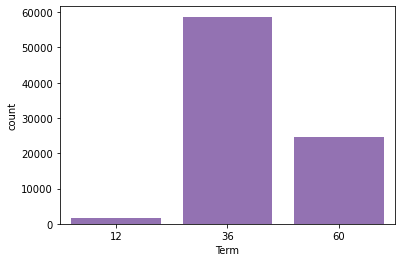

In [166]:
sns.countplot(data = loan_subdata, x = 'Term', color = default_color)

For Term: the loans time periods, there are three options: 36, 60 and 12 months. the most common trem for the loans in the dataset is 36 months. Next, let's check LoanStatus:

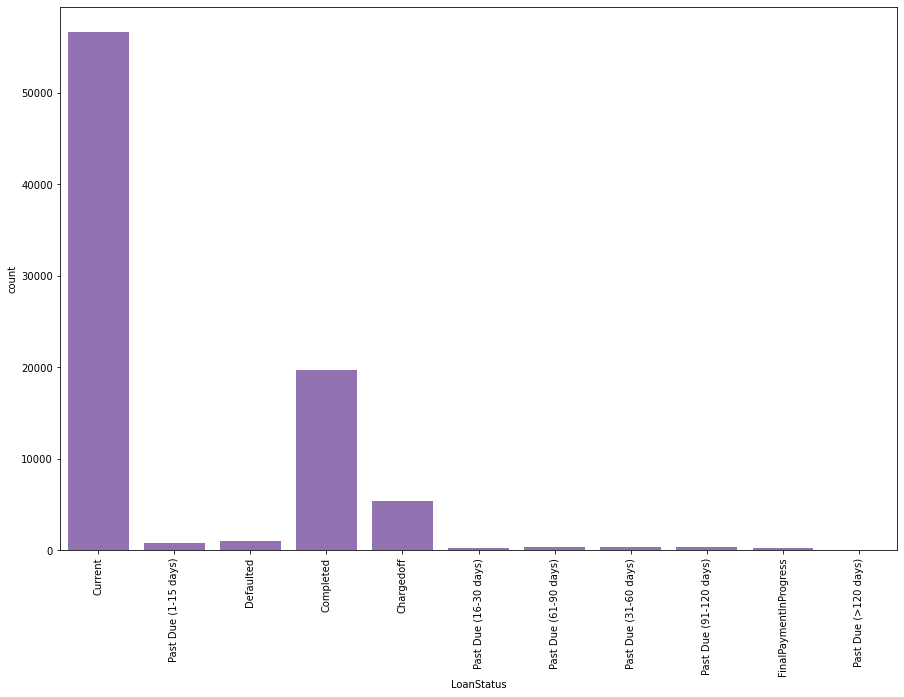

In [167]:
plt.figure(figsize=(15, 10))
sns.countplot(data = loan_subdata, x = 'LoanStatus', color = default_color)
plt.xticks(rotation = 90);

Most of the loans in the dataset are actually Current loans. Following it with a big frequency the Completed loans, followed by Chargedoff, while Defaulted and Past due categories loans represent a minority. Up next - BorrowerRate:

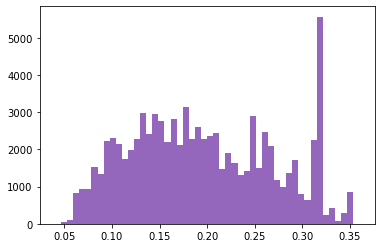

In [168]:
plt.hist(data = loan_subdata, x= 'BorrowerRate', bins = 50, color = default_color);

The distribution of the BorrowerRate appears to be bimodal with first peak around 0.16, larger peak (true mode) around 0.32. Let's check number of occurrences:

In [169]:
loan_subdata.BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3199    1645
Name: BorrowerRate, dtype: int64

* Turns out two most common rates are 0.3177 and 0.3199. Let's check ProsperRating (Alpha) next:

* Because ProsperRating (Alpha) is ordinal categorial variable (From the highest rating A to the lowest HR) We need to convert it using pandas:

In [170]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_list)
loan_subdata['ProsperRating (Alpha)'] = loan_subdata['ProsperRating (Alpha)'].astype(ordered_var)

<AxesSubplot:xlabel='ProsperRating (Alpha)', ylabel='count'>

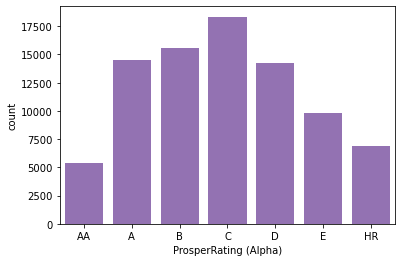

In [171]:
sns.countplot(data = loan_subdata, x = 'ProsperRating (Alpha)', color = default_color)

Interestingly enough ratings are almost normally distributed with the highest AA rating and the lowest rating HR are the least common and average rating C being the most common. Now let's see about purpose of the loan through ListingCategory (numeric):

<AxesSubplot:xlabel='ListingCategory (numeric)', ylabel='count'>

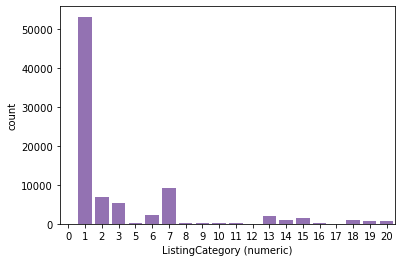

In [172]:
sns.countplot(data = loan_subdata, x = 'ListingCategory (numeric)', color = default_color)

he category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

The vast majority of loans are used for debt consolidation. Other notable categories include Other, Auto, Home Improvement and Business. Next variable - EmploymentStatus:

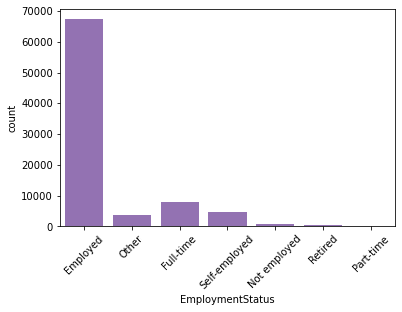

In [173]:
sns.countplot(data=loan_subdata, x='EmploymentStatus', color=default_color)
plt.xticks(rotation=45);

The majority of borrowers are Employed all other categories constitute only small numbers of the borrowers. Let's move to the DelinquenciesLast7Years variable:

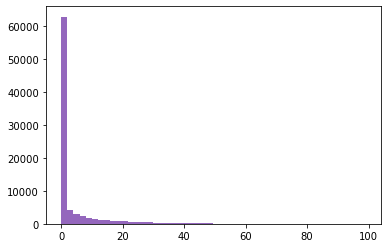

In [174]:
plt.hist(data=loan_subdata, x='DelinquenciesLast7Years', bins=50, color=default_color);

Most of the Prosper clients have 0 delinquencies for the last 7 years, a small minority has up to 20 delinquencies and very tiny group had more than 20 but less than 100 delinquencies. Next let's take a look at StatedMonthlyIncome:

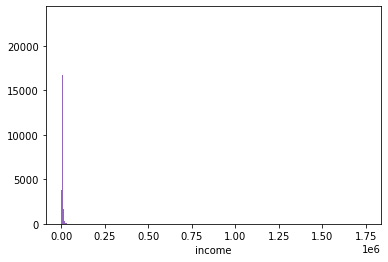

In [175]:

plt.hist(data=loan_subdata, x='StatedMonthlyIncome', bins=1000, color=default_color)
plt.xlabel('income');

In [176]:
loan_subdata.StatedMonthlyIncome.describe()

count    8.485300e+04
mean     5.931175e+03
std      8.239944e+03
min      0.000000e+00
25%      3.434000e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

Distribution of stated monthly income is highly skewed to the right. Let's check the outliers of the loan data:

In [177]:
# If a data point is far from the mean by more than 3 standard deviations it will be considered an outlier
income_std = loan_subdata['StatedMonthlyIncome'].std()
income_mean = loan_subdata['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(loan_subdata[loan_subdata['StatedMonthlyIncome'] >= boundary])

245

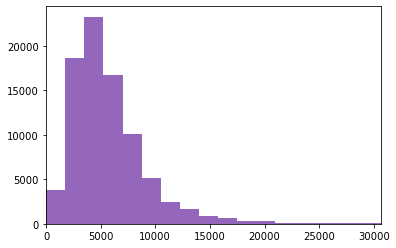

In [178]:
plt.hist(data = loan_subdata, x = 'StatedMonthlyIncome',bins = 1000, color = default_color)
plt.xlim(0, boundary);

With a boundary of mean + three standard deviations, the distribution of the monthly income still has noticeable right skew but now we can see that mode is about 5,000. Next step – TotalProsperLoans:

<AxesSubplot:xlabel='TotalProsperLoans', ylabel='count'>

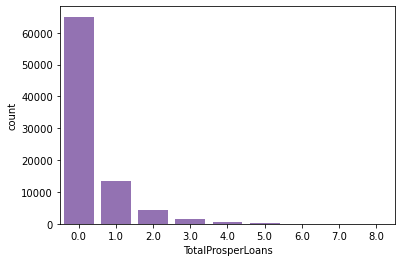

In [179]:
sns.countplot(data = loan_subdata, x = 'TotalProsperLoans', color = default_color)

For the most clients this is their first loan at prosper, small minority of clients already borrowed 1, 2 or 3 loans, the maximum is 8 loans. Next step - LoanOriginalAmount:

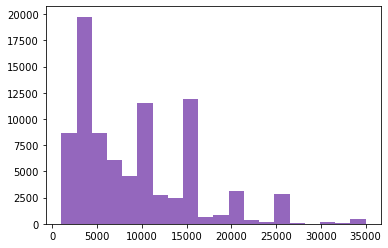

In [180]:
plt.hist(data = loan_subdata, x = 'LoanOriginalAmount',bins = 20, color = default_color);

It looks like most of the loans are below 15,000 range and people often borrow in increments of 5 thousands i.e. 5000, 10000, 15000, 20000 etc. Let's move on to LoanOriginationDate:

(array([ 249.,  396.,  731.,  617.,  507.,  702.,  717.,  685.,  627.,
         542.,  658.,  731.,  636.,  859.,  957., 1225., 1031., 1349.,
        1659., 1651., 1872., 2100., 2072., 2298., 2281., 2651., 2465.,
        2690., 2176., 1663., 1392., 2164., 2962., 3736., 3945., 4006.,
        6482., 7001., 7288., 7080.]),
 array([14445. , 14487.4, 14529.8, 14572.2, 14614.6, 14657. , 14699.4,
        14741.8, 14784.2, 14826.6, 14869. , 14911.4, 14953.8, 14996.2,
        15038.6, 15081. , 15123.4, 15165.8, 15208.2, 15250.6, 15293. ,
        15335.4, 15377.8, 15420.2, 15462.6, 15505. , 15547.4, 15589.8,
        15632.2, 15674.6, 15717. , 15759.4, 15801.8, 15844.2, 15886.6,
        15929. , 15971.4, 16013.8, 16056.2, 16098.6, 16141. ]),
 <BarContainer object of 40 artists>)

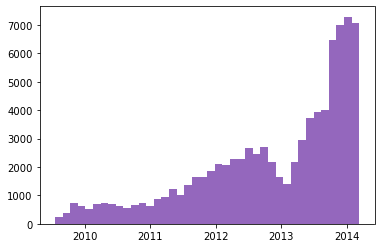

In [181]:
plt.hist(data = loan_subdata, x = 'LoanOriginationDate',bins = 40, color = default_color)

we see a substantial increase

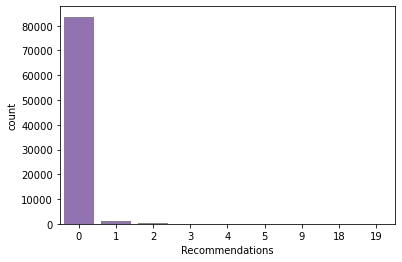

In [182]:
sns.countplot(data=loan_subdata, x='Recommendations', color=default_color);

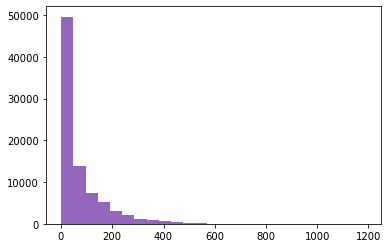

In [183]:
plt.hist(data=loan_subdata, x='Investors', bins=25, color=default_color);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
Prosper ratings are almost normally distributed. Distribution of monthly stated income is very awkward: with a lot of outliers and a very large range of values, because this is evidently based on borrowers' self-reporting, I think there is a lot of wrong values, we will wrangle with it bellow. I did not feel like any scale transformations can be useful here. Most loans are below 15,000, it seems like most loans are increments of 5,000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans (and loans with a specified past due period) also chargedoff loans can be considered as defaulted. We will make some adjustments to the data in the next step:

In [184]:
loan_subdata.LoanStatus.value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [185]:
# leaving only completed chargedoff or defaulted listings
condition = (loan_subdata['LoanStatus'] == 'Completed') | (loan_subdata['LoanStatus'] == 'Defaulted') | (loan_subdata['LoanStatus'] == 'Chargedoff')
loan_subdata = loan_subdata[condition]

In [186]:
# setting chargedoff as defaulted
def change_to_defaulted(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']


In [187]:
loan_subdata['LoanStatus'] = loan_subdata.apply(change_to_defaulted, axis=1)

In [188]:
#Check the values counts again
loan_subdata['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

In [189]:
# helper function:
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
def reduce_categories(row):
    loan_category = row['ListingCategory (numeric)']
    if  loan_category in categories:
        return categories[loan_category]
    else:
        return categories[7]

In [190]:
loan_subdata['ListingCategory (numeric)'] = loan_subdata.apply(reduce_categories, axis=1)

In [191]:
loan_subdata['ListingCategory (numeric)'].value_counts()

Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: ListingCategory (numeric), dtype: int64

In [192]:
# eliminate the outliers
loan_subdata = loan_subdata[loan_subdata['StatedMonthlyIncome'] < boundary]

# Bivariate Exploration

Let's start with the pair-wise correlation between all numeric variables:

In [193]:
loan_subdata.columns

Index(['index', 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)',
       'ListingCategory (numeric)', 'EmploymentStatus',
       'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans',
       'LoanOriginalAmount', 'LoanOriginationDate', 'Recommendations',
       'Investors'],
      dtype='object')

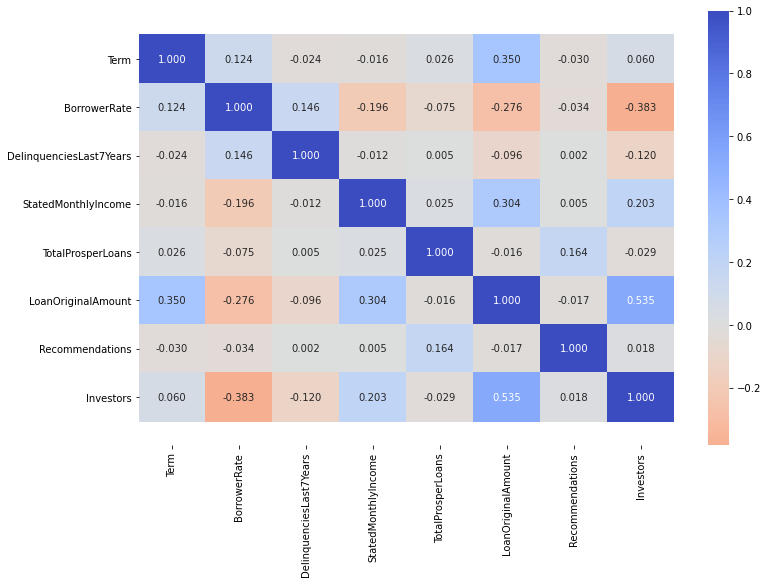

In [196]:
# extract the numerical varibles
numeric_vars = ['Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
                'TotalProsperLoans', 'LoanOriginalAmount', 'Recommendations', 'Investors'
               ]
# settings of the heatmap
plt.figure(figsize = [12, 8])
ax = sns.heatmap(loan_subdata[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'coolwarm_r', center = 0)

# adjust the cutted edges of the heatmap
bottom, top = ax.get_ylim() 
ax.set_ylim(bottom + 0.5, top - 0.5);


* Interestingly there is no strong correlation between variables in this dataset.
* There is some moderate positive correlation between LoanOriginalAmount and Term, LoanOriginalAmount and number of Investors, * * LoanOriginalAmount and StatedMonthlyIncome, Recommendations and TotalProsperLoans, number of delinquencies and borrowers rate.
* There is also moderate negative correlation between loan amount and borrower rate and number of investors and borrower rate.
* Let's move to the categorical features:

C:\Users\Varun Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Varun Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Varun Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

<Figure size 720x720 with 0 Axes>

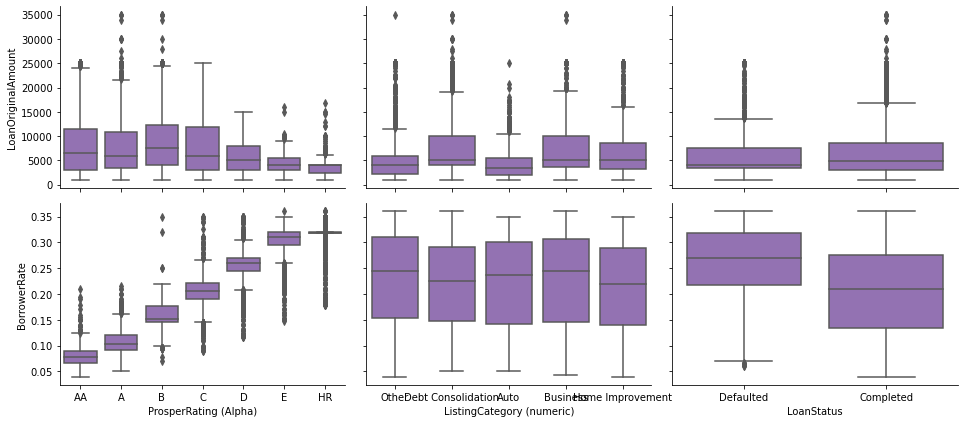

In [199]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerRate']
categoric_vars = ['ProsperRating (Alpha)', 'ListingCategory (numeric)', 'LoanStatus']


def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    sns.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_subdata, y_vars = numeric_vars, x_vars = categoric_vars,
                height = 3, aspect = 1.5)
g.map(boxgrid);
plt.show();

orrowers with lower rating in general receive lower loan amount and higher interest rate. Amounts borrowed for 'other' and 'auto' purposes are usually lower than other categories, the rate does not fluctuate much between various purposes of loans. Defaulted loans tend to be somewhat smaller than Completed. Borrower Rate for defaulted loans is considerably higher than for the completed but this is due to clients with lower rating get higher interest rate.

Let's check what can influence an outcome of credit starting with Listing Category:

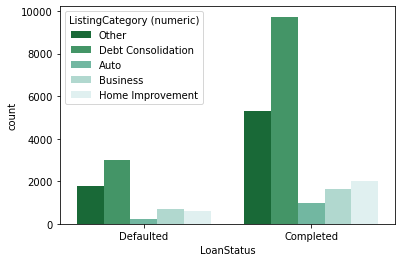

In [201]:
sns.countplot(data=loan_subdata, x='LoanStatus', hue='ListingCategory (numeric)', palette='BuGn_r');

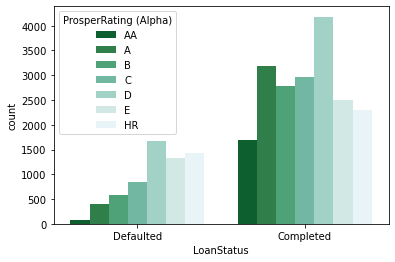

In [203]:
sns.countplot(data=loan_subdata, x='LoanStatus', hue='ProsperRating (Alpha)', palette='BuGn_r');

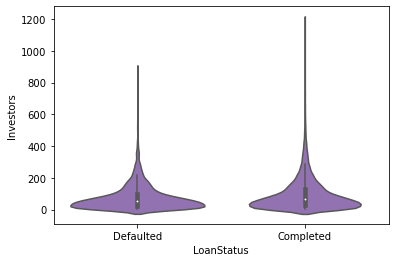

In [205]:
sns.violinplot(data = loan_subdata, x = 'LoanStatus', y = 'Investors', color = default_color);

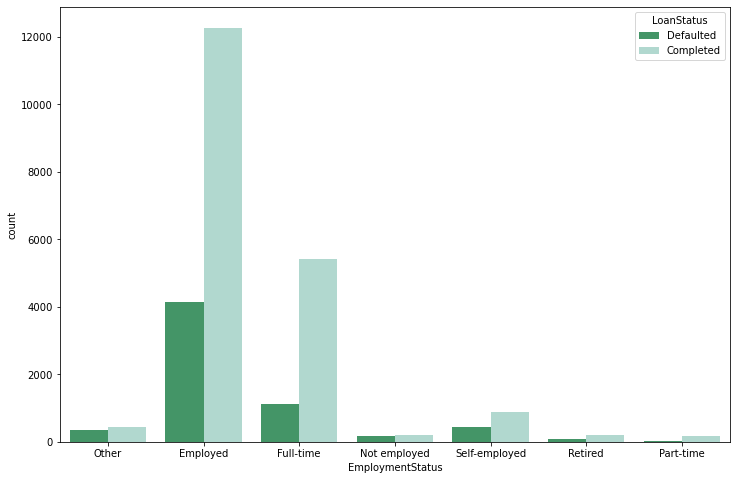

In [206]:
plt.figure(figsize = [12, 8])
sns.countplot(data=loan_subdata, x='EmploymentStatus', hue='LoanStatus', palette='BuGn_r');

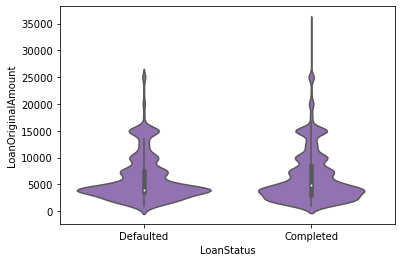

In [208]:
sns.violinplot(data = loan_subdata, x = 'LoanStatus', y = 'LoanOriginalAmount', color = default_color);

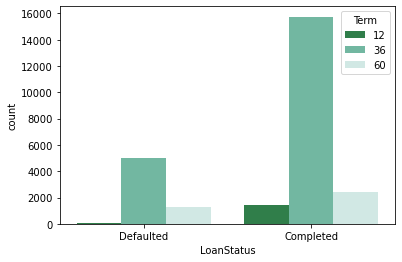

In [209]:
sns.countplot(data=loan_subdata, x='LoanStatus', hue='Term', palette='BuGn_r');

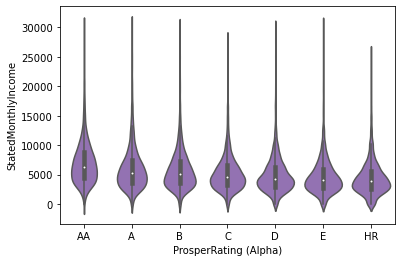

In [211]:
sns.violinplot(data = loan_subdata, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', color = default_color);

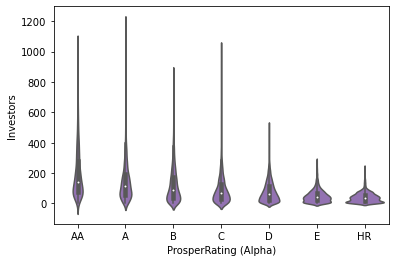

In [212]:
sns.violinplot(data = loan_subdata, x='ProsperRating (Alpha)', y='Investors', color = default_color);

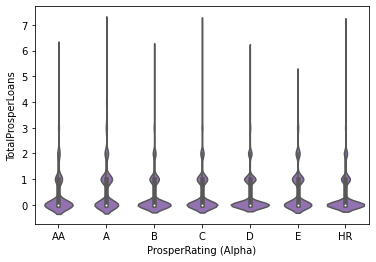

In [213]:
sns.violinplot(data = loan_subdata, x = 'ProsperRating (Alpha)', y = 'TotalProsperLoans', color = default_color);

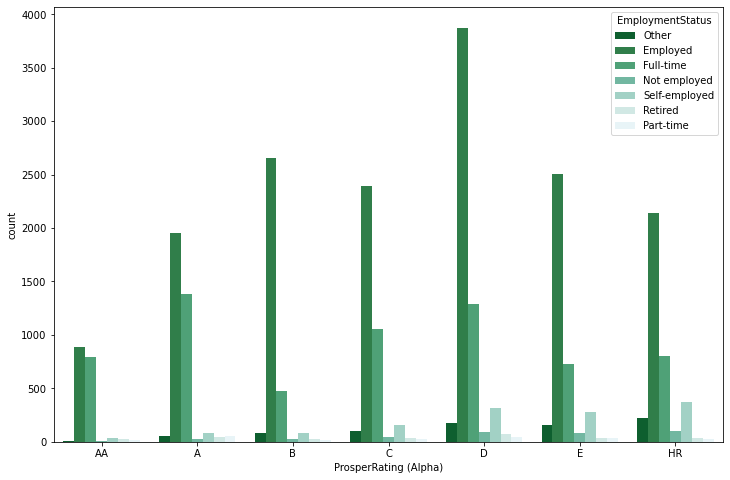

In [215]:
plt.figure(figsize = [12, 8])
sns.countplot(data = loan_subdata, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette='BuGn_r');

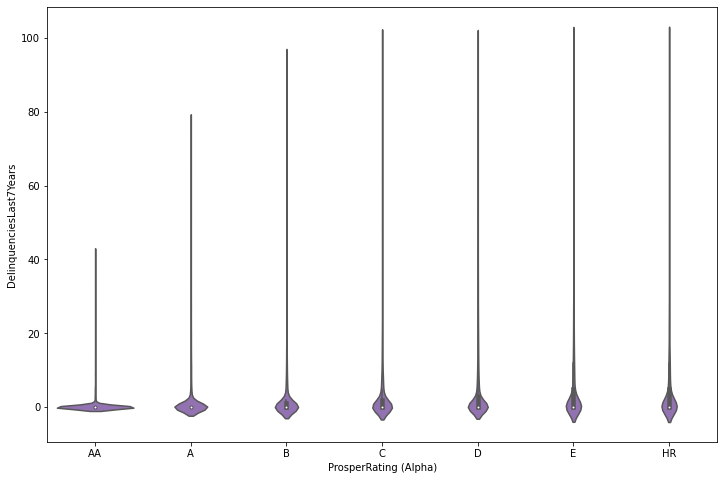

In [217]:
plt.figure(figsize = [12, 8])
sns.violinplot(data = loan_subdata, x = 'ProsperRating (Alpha)', y = 'DelinquenciesLast7Years', color = default_color);

Indivuduals with highest AA rating tend to have less delinquencies than others.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
As expected default credits tend to be given to individuals with lower rating. Business and home improvement seems to be riskier categories. The borrower rate tends to be higher for defaulted credits. Long term (60 months) credits are riskier than short term (12 months). Borrower rate for individuals with low rating is higher. High monthly income corresponds to higher rating. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
One interesting thing I've observed is that prosper rating D is the most frequent rating among defaulted credits.

# Multivariate Exploration
Let's have a closer look on relationship between Term, Rate, Delinquencies, Monthly Income, Loan Amount and Loan Status.

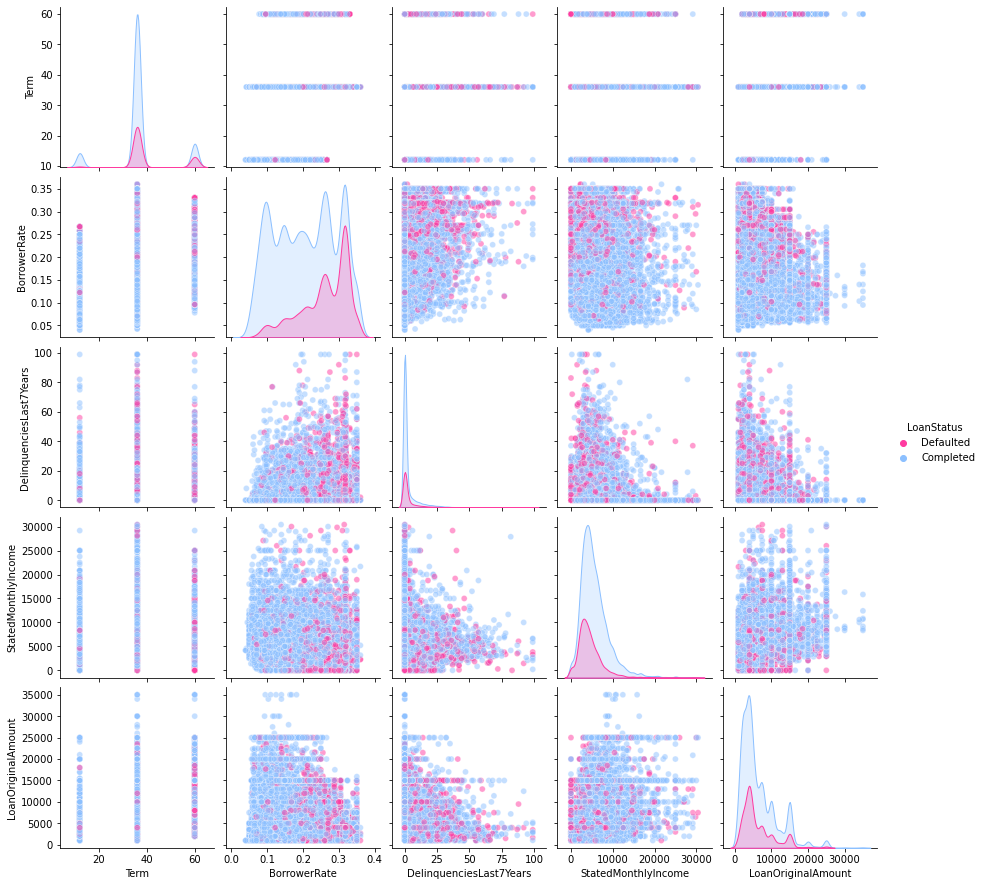

In [219]:
# extract and visualize the features of interest
cols = [
    'Term', 'BorrowerRate', 'DelinquenciesLast7Years', 'StatedMonthlyIncome',
    'LoanOriginalAmount', 'LoanStatus'
       ]
g = sns.pairplot(loan_subdata[cols], hue='LoanStatus',
                palette={'Defaulted': '#ff3ba0', 'Completed': '#8cc0ff'},
                plot_kws={'alpha': 0.5, 'edgecolor': 'white'})
fig = g.fig;

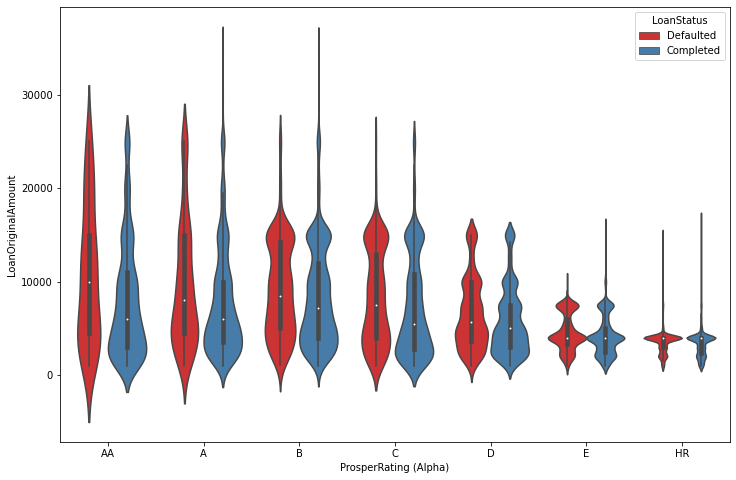

In [221]:
plt.figure(figsize = [12, 8])
sns.violinplot(data=loan_subdata, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus', palette="Set1");

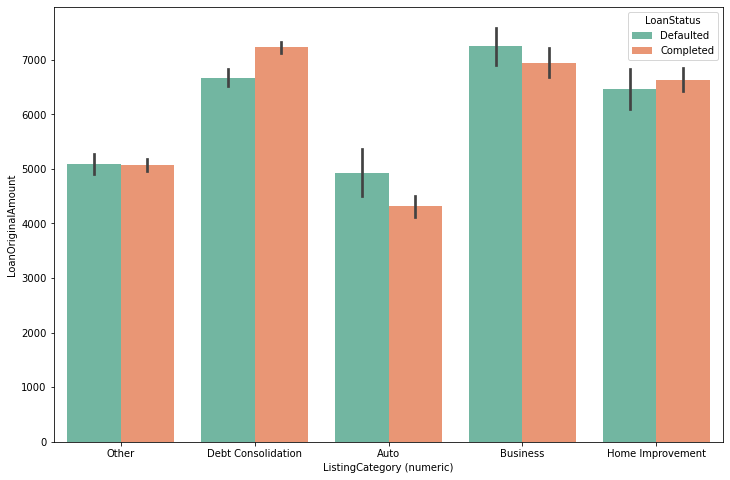

In [223]:
plt.figure(figsize = [12, 8])
sns.barplot(data=loan_subdata, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus', palette="Set2");

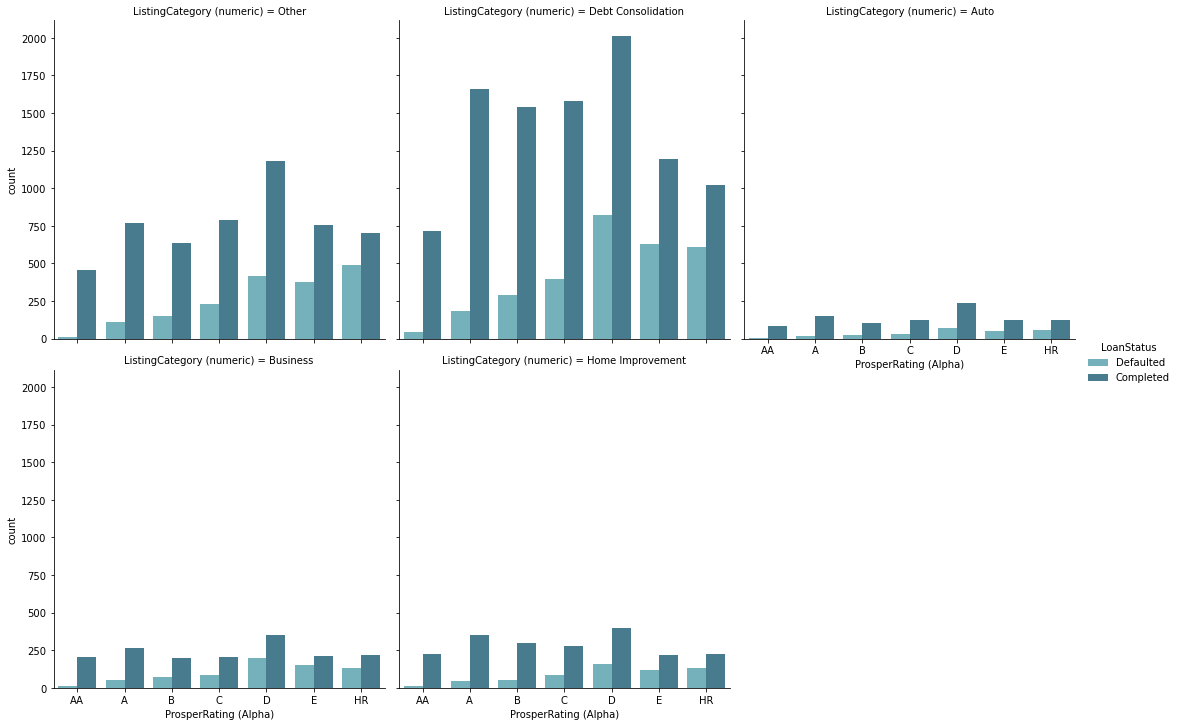

In [224]:
sns.catplot(x='ProsperRating (Alpha)', hue='LoanStatus', col='ListingCategory (numeric)',
              data=loan_subdata, kind='count', palette='GnBu_d', col_wrap=3
             );

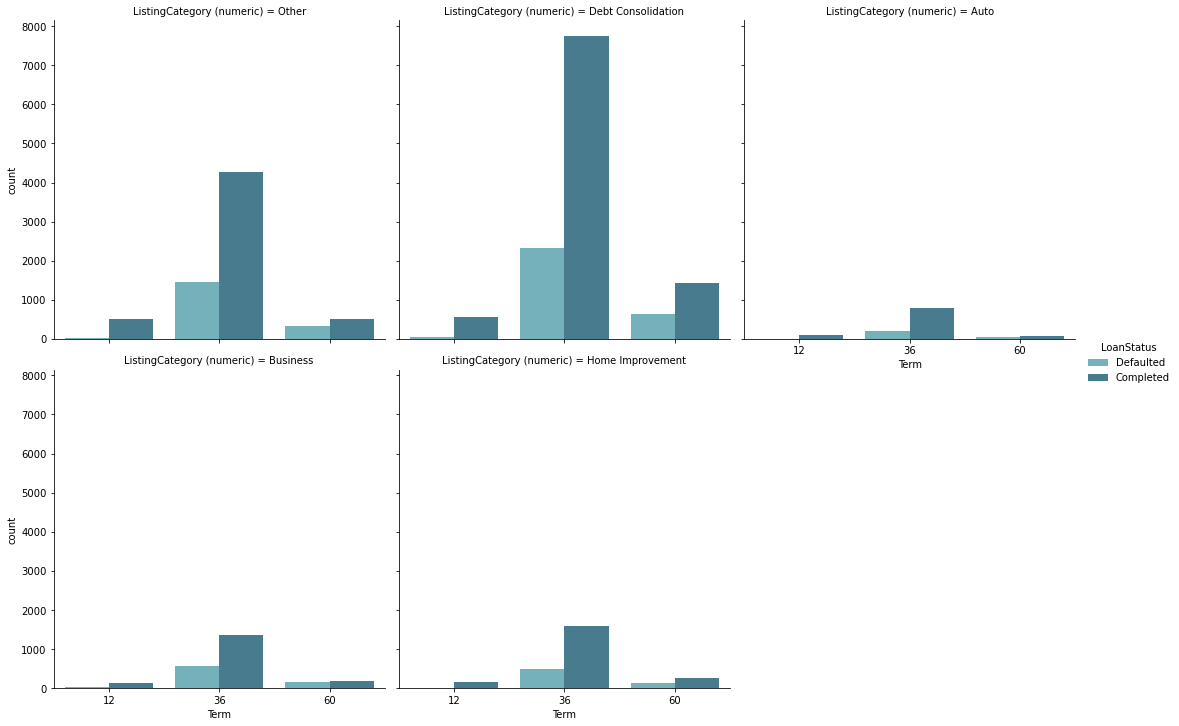

In [225]:
sns.catplot(x='Term', hue='LoanStatus', col='ListingCategory (numeric)',
              data=loan_subdata, kind='count', palette='GnBu_d', col_wrap=3
             );

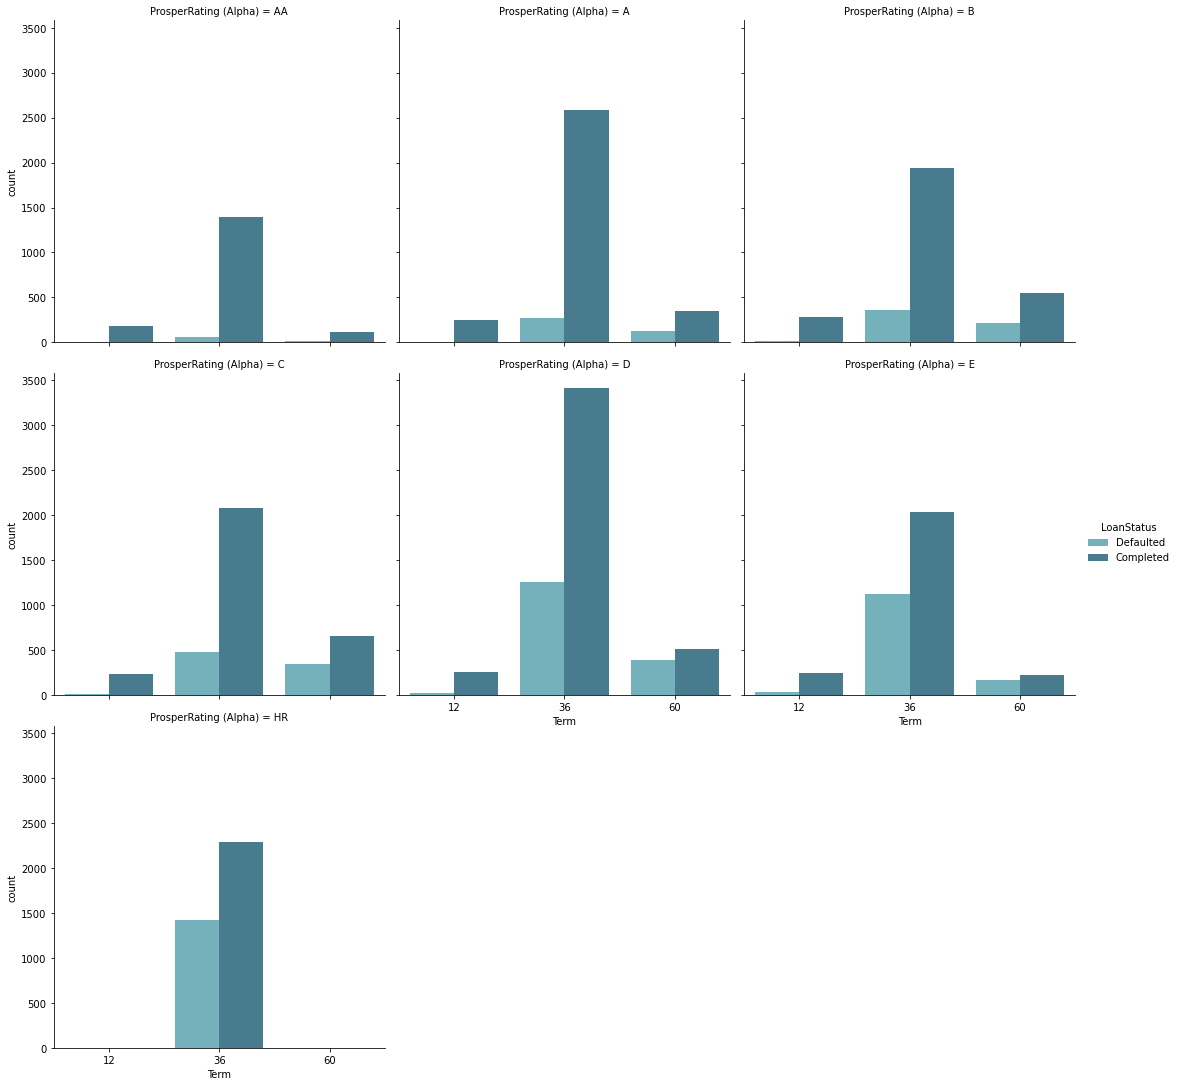

In [226]:
sns.catplot(x='Term', hue='LoanStatus', col='ProsperRating (Alpha)',
              data=loan_subdata, kind='count', palette='GnBu_d', col_wrap=3
             );

Long term (60 months) credit seems to be riskier than mid-term (36 months) or short-term (12 months). Interestingly enough there is no short-term or long-term credits for the lowest credit rating.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
Our initial assumptions were strengthened. The outcome of credit depends on Prosper raing, Term, Employment status. Defaulted credits tend to be larger than completed for all ratings except the lowest ones. In terms of purposes of credits more default prone are other and business categories (business category also tend to have larger loans). Long term (60 months) loans are riskier than mid-term and short term.

### Were there any interesting or surprising interactions between features?
Interesting find was that defaulted credits for individuals with high Prosper ratings tend to be larger than completed credits. Another interesting find that individuals with lowerst rating (HR) have only mid-term (36 months) credits.